In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
from IPython.display import Image

df = pd.read_csv('titanic.csv')

df['male'] = df['Sex']=="male"

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

Tendency to Overfit

In [2]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)
dt.fit(X,y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

GridSearchCV has four parameters that we’ll use:
1. The model (in this case a DecisionTreeClassifier)
2. Param grid: a dictionary of the parameters names and all the possible values
3. What metric to use (default is accuracy)
4. How many folds for k-fold cross validation

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best param",gs.best_params_)
print("best score",gs.best_score_)

best param {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
best score 0.6506779917168288


## Random Forest

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

df['target'].describe()

data dimensions (569, 30)


count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row])[0])
print("true value:", y_test[0])

prediction: 1
true value: 1


In [6]:
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.965034965034965


In [7]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100],
}
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
gs.fit(X, y)
print("best params:", gs.best_params_)


best params: {'n_estimators': 25}


#### Elbow Graph

In [8]:
n_estimators = list(range(1, 101))

param_grid = {
    'n_estimators': n_estimators,
}

rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

scores = gs.cv_results_['mean_test_score']

# [0.91564148, 0.90685413, ...]

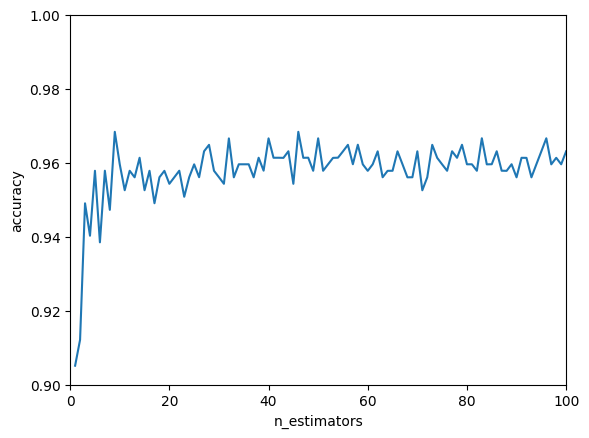

In [9]:
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [10]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 

RandomForestClassifier(n_estimators=10)

### Feature Importances

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
print(ft_imp.head(10))
 

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


### Artificial Neural Networks

Creating artificial datasets

In [17]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


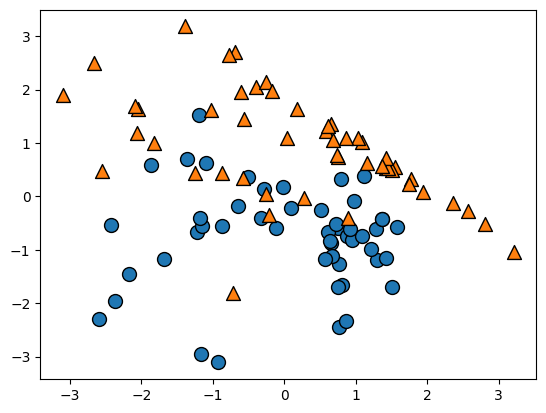

In [18]:
from matplotlib import pyplot as plt
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.show()

### MLP Classifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.68


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100, 50), alpha=0.0001, solver='adam', random_state=3)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


### The MNIST Dataset

In [8]:
from sklearn.datasets import load_digits
X, y = load_digits(n_class=2, return_X_y=True)
print(X.shape, y.shape)
print(X[0].reshape(8, 8))
print(y[0])

(360, 64) (360,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


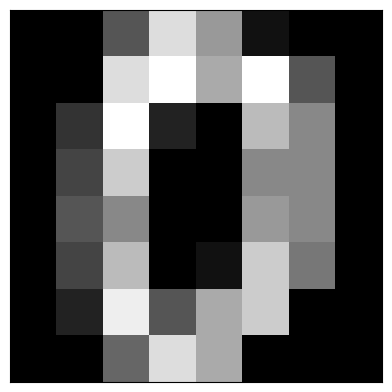

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

1.0


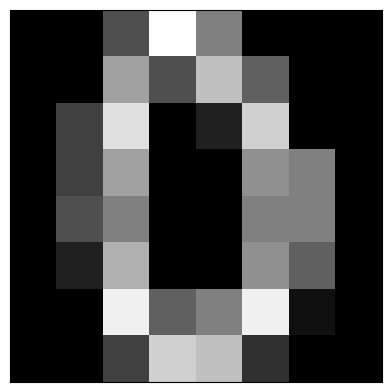

[0]


In [11]:
x = X_test[0]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

print(mlp.predict([x]))
# 0

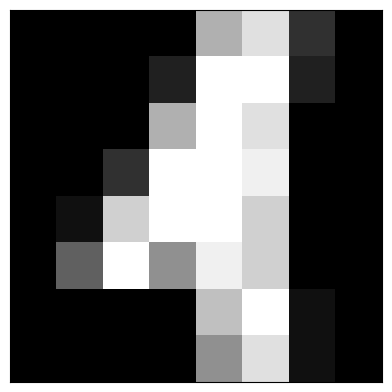

[1]


In [12]:
x = X_test[1]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))
# 1

### Classifyng all digits

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

(1797, 64) (1797,)
0.96


In [15]:
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test] 

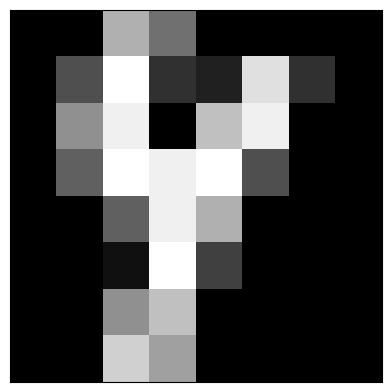

true value: 4
predicted value: 9


In [16]:
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])

OpenML

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


URLError: <urlopen error Tunnel connection failed: 407 Proxy Authentication Required>